In [113]:
import numpy.random as random
from matplotlib.patches import Ellipse

In [114]:
# Load a whole bunch of random variables
mu, sigma = random.randint(0, 10), random.uniform(0.1, 0.9)
rand_vals = random.normal(mu, sigma, size=1000)

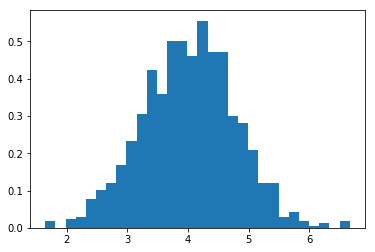

In [115]:
plt.hist(rand_vals, bins=30, density=True)
plt.show()

In [116]:
# Calculate Expectation
mu = np.sum(rand_vals) / len(rand_vals)
print(mu)
# Calculate Variance E[f] = E(f - E(f)^2)
var = np.sum((rand_vals - mu)**2) / len(rand_vals)
std_dev = var**0.5
print(var)
print(std_dev)

4.019260283965967
0.5898524569582912
0.7680185264420978


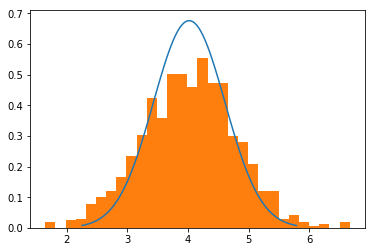

In [117]:
x = np.linspace(mu - 3*var, mu + 3*var, 100)
plt.plot(x, stats.norm.pdf(x, mu, var))
plt.hist(rand_vals, bins=30, density=True)
plt.show()

[[0.06637536768671679, 0.05050997982764246], [0.05050997982764246, 0.19668548696824145]]


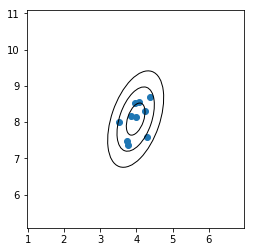

In [217]:
# Now let's try plotting working in 2D
mu_x, sigma_x = random.randint(0, 5), random.uniform(0.1, 0.4)
mu_y, sigma_y = random.randint(6, 10), random.uniform(0.5, 0.9)
rand_x = random.normal(mu_x, sigma_x, size=10)
rand_y = random.normal(mu_y, sigma_y, size=10)

# Calculate covariances
mu_x = np.sum(rand_x) / len(rand_x)
mu_y = np.sum(rand_y) / len(rand_y)
diff_x = rand_x - mu_x
diff_y = rand_y - mu_y
cov_xy = np.sum(diff_x * diff_y) / len(rand_x)
cov_x = np.sum((diff_x)**2)/len(rand_x)
cov_y = np.sum((diff_y)**2)/len(rand_y)

# make the covariance matrix
cov_mat = [[cov_x, cov_xy], [cov_xy, cov_y]]
print(cov_mat)

# Plot
ax = plt.subplot(111, aspect='equal')
plt.xlim(mu_x - 3, mu_x + 3)
plt.ylim(mu_y - 3, mu_y + 3)
plt.scatter(rand_x, rand_y)

# Plot the covariances as ellipses
lambda_, v = np.linalg.eig(cov_mat)
lambda_ = np.sqrt(lambda_)

for j in range(1,4):
    ell = Ellipse(xy=(mu_x, mu_y),
                  width=lambda_[0]*2*j, height=lambda_[1]*2*j,
                  angle=np.rad2deg(np.arccos(v[0, 0])),
                  edgecolor='k')
    ell.set_facecolor('none')
    ax.add_artist(ell)
plt.show()